## Masked Properly?
### Group 1

#### Image Classification using Tensor Flow

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import os
import struct
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

print(f'TensorFlow version= {tf.__version__}')
print(f"CUDA available= {tf.test.gpu_device_name()}")

# # Check CUDA TensorFlow
tf.test.is_built_with_cuda()

TensorFlow version= 2.8.0
CUDA available= 


True

###### Gather a small subset of data

In [2]:
IMGSIZE = (128, 128)
X, Y = [],[]
max_test_size = 18000
count = 0
break_flag = False
# Read in images
path = './CMFD/CMFD'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[1,0]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

max_test_size = 18000
count = 0
break_flag = False
# Read in images
path = './IMFD/IMFD'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[0,1]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

read 500 images
read 1000 images
read 1500 images
read 2000 images
read 2500 images
read 3000 images
read 3500 images
read 4000 images
read 4500 images
read 5000 images
read 5500 images
read 6000 images
read 6500 images
read 7000 images
read 7500 images
read 8000 images
read 8500 images
read 9000 images
read 9500 images
read 10000 images
read 10500 images
read 11000 images
read 11500 images
read 12000 images
read 12500 images
read 13000 images
read 13500 images
read 14000 images
read 14500 images
read 15000 images
read 15500 images
read 16000 images
read 16500 images
read 17000 images
read 17500 images
read 18000 images
read 500 images
read 1000 images
read 1500 images
read 2000 images
read 2500 images
read 3000 images
read 3500 images
read 4000 images
read 4500 images
read 5000 images
read 5500 images
read 6000 images
read 6500 images
read 7000 images
read 7500 images
read 8000 images
read 8500 images
read 9000 images
read 9500 images
read 10000 images
read 10500 images
read 11000 ima

### Add in the face vs mask image database with real masks

In [3]:
# Read in images
max_test_size = 1600
path = './RMFD/Masked_All/'
count = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[1,0]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

max_test_size = 1600
count = 0
break_flag = False
# Read in images
path = './RMFD/Improper_All/'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
        #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
            Y += [[0,1]]
            count += 1
            if (count+1) % 500 == 1:
                print(f'read {count} images')
            if count == max_test_size:
                break_flag = True
                break
    if break_flag == True:
        break

read 500 images
read 1000 images
read 1500 images
read 500 images
read 1000 images
read 1500 images


In [4]:
IMGSIZE = (128, 128)
skip_amnt = -1
max_test_size = 10
# Read in images
path = './CMFD_google'
count = 0
skip = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[1,0]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

max_test_size = 10
count = 0
skip = 0
break_flag = False
# Read in images
path = './IMFD_google'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y += [[0,1]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

In [5]:
print(f'Shape of the data: {X[0].shape}')
print(f'There are {len(X)} mask images')

Shape of the data: (128, 128, 3)
There are 39220 mask images


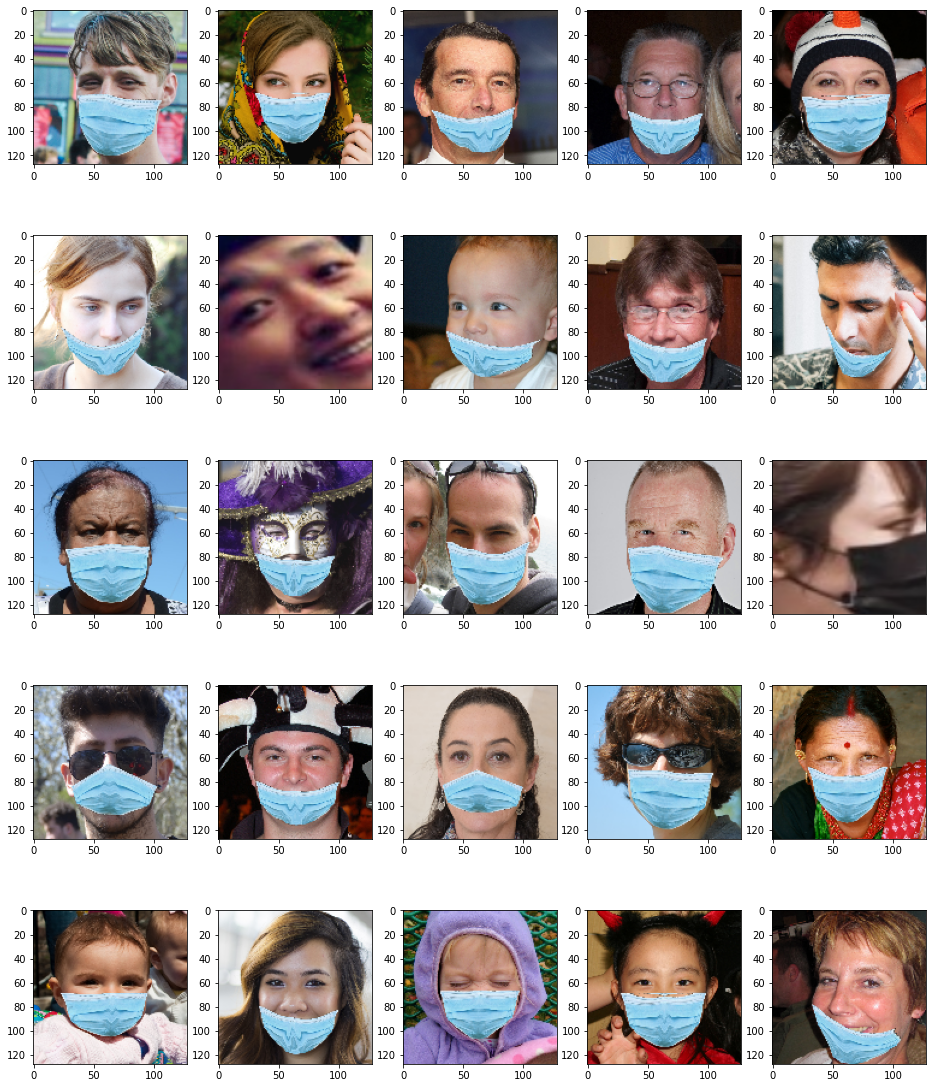

In [6]:
from random import randrange
# plot 25 random photos
random_indx = []
for i in range(25):
    random_indx.append(randrange(len(X)))

fig, ax = plt.subplots(5,5,figsize=(16,20))
count = 0
for r in range(5):
    for c in range(5):
        ax[r][c].imshow(X[random_indx[count]],cmap='gray')
        count = count + 1
plt.show()

## Preprocessing

1) Make sure the size of the images meet the input layer size requirements <br>
    a. Completed above, downsampled to 128 x 128 using opencv
2) Make sure images are rgb bgr like opencv reads them <br>
3) Scale from 0 to 1 <br>

In [7]:
print('Train Images:')
X_scaled = np.array(X)
print(f'shape of numpy array: {X_scaled.shape}')
print('Before scaling:')
print(f'min value {np.min(X_scaled)}')
print(f'max value {np.max(X_scaled)}')
X_scaled = X_scaled/255
print('After scaling:')
print(f'min value {np.min(X_scaled)}')
print(f'max value {np.max(X_scaled)}')

Train Images:
shape of numpy array: (39220, 128, 128, 3)
Before scaling:
min value 0
max value 255
After scaling:
min value 0.0
max value 1.0


In [8]:
# convert the labels into arrays
# brute force
Y = np.array(Y)

# sanity check
print(f'label size: {Y.shape}')
print(f'mean value: {np.mean(Y, axis=0)}')

label size: (39220, 2)
mean value: [0.5 0.5]


## Create Test and Train Sets

1) The initial test train set will be split 80 20 <br>
2) Eventually the 10 fold cross validation will be used to assess success <br>

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.0001, random_state=42)

print(f'test size: {Y_test.shape}')
print(f'train size: {Y_train.shape}')
print(f'mean label test: {np.mean(Y_test)}')
print(f'mean label train: {np.mean(Y_train)}')

test size: (4, 2)
train size: (39216, 2)
mean label test: 0.5
mean label train: 0.5


### Create CNN

In [10]:
# Our full CNN neural network
cnn1 = tf.keras.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=1024, name='fc_2', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=2, name='fc_o', activation='softmax'))



In [11]:
X_train.shape

(39216, 128, 128, 3)

In [12]:
# Set a seed for repeatibility
tf.random.set_seed(42)

# Build the model
cnn1.build(input_shape=(None, 128, 128, 3)) # None, 1024, 1024, 3 for rgb

# Compile the model with the optimizer, loss function and metric
cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 4



In [13]:
%%time
history = cnn1.fit(X_train, Y_train,
        epochs=NUM_EPOCHS,
        shuffle=True)

Epoch 1/4
1226/1226 [==============================] - 284s 230ms/step - loss: 0.0644 - accuracy: 0.9777
Epoch 2/4
1226/1226 [==============================] - 277s 226ms/step - loss: 0.0269 - accuracy: 0.9916
Epoch 3/4
1226/1226 [==============================] - 276s 225ms/step - loss: 0.0214 - accuracy: 0.9925
Epoch 4/4
1226/1226 [==============================] - 276s 225ms/step - loss: 0.0170 - accuracy: 0.9941
CPU times: total: 3h 16min 20s
Wall time: 20min 10s


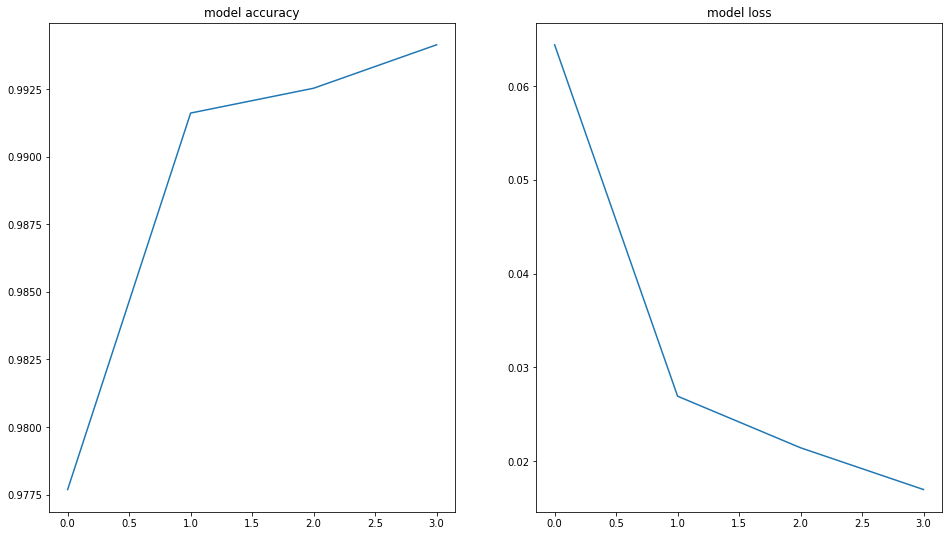

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,9))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('model accuracy')

ax[1].plot(history.history['loss'])
ax[1].set_title('model loss')

plt.show()

In [15]:
# Training reclassification
y_pred = cnn1.predict(X_train)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_train, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 99.643


In [16]:
# Testing dataset
y_pred = cnn1.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_test, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 100.000


#### Real Data Test

Get data never seen before

In [17]:
IMGSIZE = (128, 128)
skip_amnt = 1500
max_test_size = 500
X_RMFD, Y_RMFD = [],[]
# Read in images
path = './RMFD/AFDB_masked_face_dataset/'
count = 0
skip = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X_RMFD += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y_RMFD += [[1,0]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

max_test_size = 500
count = 0
skip = 0
break_flag = False
# Read in images
path = './RMFD/AFDB_face_dataset/'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X_RMFD += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y_RMFD += [[0,1]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

read 500 images
read 500 images


In [18]:
X_test_real = np.array(X_RMFD)
X_test_real = X_test_real/255
Y_test_real = np.array(Y_RMFD)
print(f'Real test set size: {X_test_real.shape}')

Real test set size: (1000, 128, 128, 3)


In [19]:
# Testing dataset
y_pred = []
y_pred = cnn1.predict(X_test_real)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_test_real, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 96.100


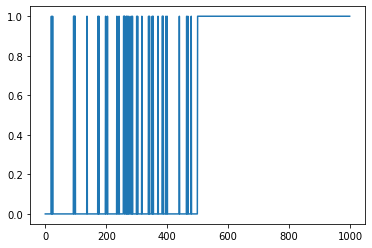

In [20]:
plt.plot(y_pred)

In [25]:
IMGSIZE = (128, 128)
skip_amnt = 0
max_test_size = 100
X_google, Y_google = [],[]
# Read in images
path = './CMFD_google'
count = 0
skip = 0
break_flag = False

for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X_google += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y_google += [[1,0]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

max_test_size = 100
count = 0
skip = 0
break_flag = False
# Read in images
path = './IMFD_google'
for subdir, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            if skip > skip_amnt:
                X_google += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subdir,f)), cv2.COLOR_BGR2RGB), IMGSIZE)]
            #     X += [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2GRAY), IMGSIZE)]
                Y_google += [[0,1]]
                count += 1
                if (count+1) % 500 == 1:
                    print(f'read {count} images')
                if count == max_test_size:
                    break_flag = True
                    break
            else:
                skip += 1
    if break_flag == True:
        break

In [26]:
X_test_real = np.array(X_google)
X_test_real = X_test_real/255
Y_test_real = np.array(Y_google)
print(f'Real test set size: {X_test_real.shape}')

Real test set size: (32, 128, 128, 3)


In [27]:
# Testing dataset
y_pred = []
y_pred = cnn1.predict(X_test_real)
y_pred = np.argmax(y_pred, axis=-1)
y_check = np.argmax(Y_test_real, axis=-1)
print(f'Accuracy= {sum(y_pred==y_check)/len(y_pred)*100:.3f}')

Accuracy= 75.000


Text(0.5, 1.0, 'Real-World Google Images Classification')

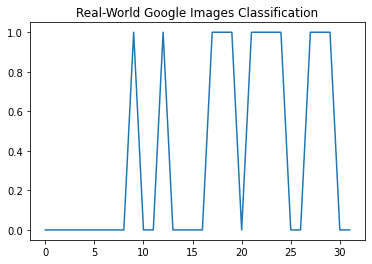

In [28]:
plt.plot(y_pred)
plt.title('Real-World Google Images Classification')